In [15]:
import matplotlib.pyplot as plt
import torch
import torch.distributions as torch_d
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
import numpy as np

from pcs_gumbel_softmax import tx
from pcs_gumbel_softmax import helper as hlp
from pcs_gumbel_softmax import utils
from pcs_gumbel_softmax import autoencoder as ae

# Parameters

In [16]:
# Channel Parameters
chParam = utils.AttrDict()
chParam.M = 64
# chParam.SNR_db = [5, 12, 18, 30]
chParam.SNR_db = [0, 5, 12, 18, 30]

# Auto-Encoder Parameters
aeParam = utils.AttrDict()
aeParam.temperature = 1
aeParam.nLayersEnc  = 1
aeParam.nLayersDec  = 2
aeParam.nFeaturesEnc  = 128
aeParam.nFeaturesDec  = 128

# Training Parameters
trainingParam = utils.AttrDict()
trainingParam.nBatches      = 16
trainingParam.batchSize     = 128*chParam.M
trainingParam.learningRate  = 0.001
trainingParam.iterations    = 101
trainingParam.displayStep   = 5

## Helper Functions

In [17]:
def p_norm(p, x, fun=lambda x: torch.pow(torch.abs(x), 2)):
    return torch.sum(p * fun(x))

In [18]:
class STEFunction(torch.autograd.Function):
    @staticmethod
    def forward(ctx, input):
        return F.one_hot(torch.argmax(input, axis=-1), chParam.M)

    @staticmethod
    def backward(ctx, grad_output):
        return grad_output

In [19]:
def r2c(x):
    return x.type(torch.complex64)

In [20]:
def plot_2D_PDF(const, pmf, db):
    s = pmf * 200
    plt.figure(figsize=(3, 3))
    plt.scatter(const.real, const.imag, s, c="r")
    plt.title(f'SNR = {db} dB')
    plt.grid()
    plt.show()

## Training Loop

---SNR = 0 dB---
epoch 0: Loss = 6.0262 dB - always 1: 1.0
epoch 5: Loss = 5.9114 dB - always 1: 1.0
epoch 10: Loss = 5.8033 dB - always 1: 1.0
epoch 15: Loss = 5.6658 dB - always 1: 1.0
epoch 20: Loss = 5.5336 dB - always 1: 1.0
epoch 25: Loss = 5.3716 dB - always 1: 1.0
epoch 30: Loss = 5.2580 dB - always 1: 1.0
epoch 35: Loss = 5.1834 dB - always 1: 1.0
epoch 40: Loss = 5.0941 dB - always 1: 1.0
epoch 45: Loss = 5.0551 dB - always 1: 1.0
epoch 50: Loss = 5.0327 dB - always 1: 1.0
epoch 55: Loss = 5.0229 dB - always 1: 1.0
epoch 60: Loss = 4.9978 dB - always 1: 1.0
epoch 65: Loss = 4.9868 dB - always 1: 1.0
epoch 70: Loss = 4.9848 dB - always 1: 1.0
epoch 75: Loss = 4.9976 dB - always 1: 1.0
epoch 80: Loss = 5.0006 dB - always 1: 1.0
epoch 85: Loss = 4.9760 dB - always 1: 1.0
epoch 90: Loss = 5.0279 dB - always 1: 1.0
epoch 95: Loss = 4.9926 dB - always 1: 1.0
epoch 100: Loss = 4.9484 dB - always 1: 1.0
Power should always be one: tensor(1., grad_fn=<SumBackward0>)


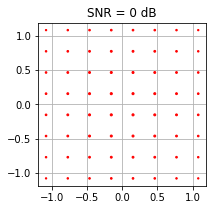

---SNR = 5 dB---
epoch 0: Loss = 5.9783 dB - always 1: 1.0
epoch 5: Loss = 5.8475 dB - always 1: 1.0
epoch 10: Loss = 5.6933 dB - always 1: 1.0
epoch 15: Loss = 5.5034 dB - always 1: 1.0
epoch 20: Loss = 5.2871 dB - always 1: 1.0
epoch 25: Loss = 5.0556 dB - always 1: 1.0
epoch 30: Loss = 4.8579 dB - always 1: 1.0
epoch 35: Loss = 4.6758 dB - always 1: 1.0
epoch 40: Loss = 4.5125 dB - always 1: 1.0
epoch 45: Loss = 4.3718 dB - always 1: 1.0
epoch 50: Loss = 4.2912 dB - always 1: 1.0
epoch 55: Loss = 4.2097 dB - always 1: 1.0
epoch 60: Loss = 4.1390 dB - always 1: 1.0
epoch 65: Loss = 4.0867 dB - always 1: 1.0
epoch 70: Loss = 4.0516 dB - always 1: 1.0
epoch 75: Loss = 3.9964 dB - always 1: 1.0
epoch 80: Loss = 3.9843 dB - always 1: 1.0
epoch 85: Loss = 3.9668 dB - always 1: 1.0
epoch 90: Loss = 3.9504 dB - always 1: 1.0
epoch 95: Loss = 3.9247 dB - always 1: 1.0
epoch 100: Loss = 3.9228 dB - always 1: 1.0
Power should always be one: tensor(1., grad_fn=<SumBackward0>)


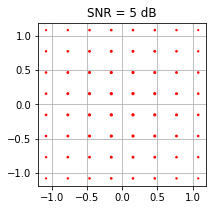

---SNR = 12 dB---
epoch 0: Loss = 6.0192 dB - always 1: 1.0
epoch 5: Loss = 5.8722 dB - always 1: 1.0
epoch 10: Loss = 5.7317 dB - always 1: 1.0
epoch 15: Loss = 5.5502 dB - always 1: 1.0
epoch 20: Loss = 5.3114 dB - always 1: 1.0
epoch 25: Loss = 5.0534 dB - always 1: 1.0
epoch 30: Loss = 4.7649 dB - always 1: 1.0
epoch 35: Loss = 4.4858 dB - always 1: 1.0
epoch 40: Loss = 4.2461 dB - always 1: 1.0
epoch 45: Loss = 4.0111 dB - always 1: 1.0
epoch 50: Loss = 3.8126 dB - always 1: 1.0
epoch 55: Loss = 3.6289 dB - always 1: 1.0
epoch 60: Loss = 3.4659 dB - always 1: 1.0
epoch 65: Loss = 3.3145 dB - always 1: 1.0
epoch 70: Loss = 3.1834 dB - always 1: 1.0
epoch 75: Loss = 3.0542 dB - always 1: 1.0
epoch 80: Loss = 2.9396 dB - always 1: 1.0
epoch 85: Loss = 2.8305 dB - always 1: 1.0
epoch 90: Loss = 2.7411 dB - always 1: 1.0
epoch 95: Loss = 2.6573 dB - always 1: 1.0
epoch 100: Loss = 2.5806 dB - always 1: 1.0
Power should always be one: tensor(1., grad_fn=<SumBackward0>)


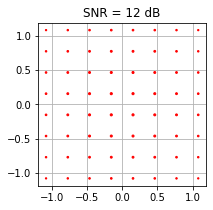

---SNR = 18 dB---
epoch 0: Loss = 6.0091 dB - always 1: 1.0
epoch 5: Loss = 5.8762 dB - always 1: 1.0
epoch 10: Loss = 5.7402 dB - always 1: 1.0
epoch 15: Loss = 5.5666 dB - always 1: 1.0
epoch 20: Loss = 5.3435 dB - always 1: 1.0
epoch 25: Loss = 5.0843 dB - always 1: 1.0
epoch 30: Loss = 4.8081 dB - always 1: 1.0
epoch 35: Loss = 4.5203 dB - always 1: 1.0
epoch 40: Loss = 4.2518 dB - always 1: 1.0
epoch 45: Loss = 3.9981 dB - always 1: 1.0
epoch 50: Loss = 3.7679 dB - always 1: 1.0
epoch 55: Loss = 3.5549 dB - always 1: 1.0
epoch 60: Loss = 3.3593 dB - always 1: 1.0
epoch 65: Loss = 3.1809 dB - always 1: 1.0
epoch 70: Loss = 3.0122 dB - always 1: 1.0
epoch 75: Loss = 2.8483 dB - always 1: 1.0
epoch 80: Loss = 2.7019 dB - always 1: 1.0
epoch 85: Loss = 2.5537 dB - always 1: 1.0
epoch 90: Loss = 2.4161 dB - always 1: 1.0
epoch 95: Loss = 2.2965 dB - always 1: 1.0
epoch 100: Loss = 2.1833 dB - always 1: 1.0
Power should always be one: tensor(1., grad_fn=<SumBackward0>)


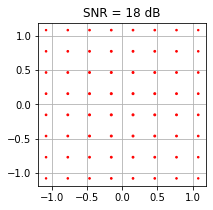

---SNR = 30 dB---
epoch 0: Loss = 6.0024 dB - always 1: 1.0
epoch 5: Loss = 5.8543 dB - always 1: 1.0
epoch 10: Loss = 5.7107 dB - always 1: 1.0
epoch 15: Loss = 5.5344 dB - always 1: 1.0
epoch 20: Loss = 5.3089 dB - always 1: 1.0
epoch 25: Loss = 5.0589 dB - always 1: 1.0
epoch 30: Loss = 4.7858 dB - always 1: 1.0
epoch 35: Loss = 4.4937 dB - always 1: 1.0
epoch 40: Loss = 4.2107 dB - always 1: 1.0
epoch 45: Loss = 3.9709 dB - always 1: 1.0
epoch 50: Loss = 3.7330 dB - always 1: 1.0
epoch 55: Loss = 3.5116 dB - always 1: 1.0
epoch 60: Loss = 3.3114 dB - always 1: 1.0
epoch 65: Loss = 3.1138 dB - always 1: 1.0
epoch 70: Loss = 2.9352 dB - always 1: 1.0
epoch 75: Loss = 2.7581 dB - always 1: 1.0
epoch 80: Loss = 2.5898 dB - always 1: 1.0
epoch 85: Loss = 2.4356 dB - always 1: 1.0
epoch 90: Loss = 2.2924 dB - always 1: 1.0
epoch 95: Loss = 2.1462 dB - always 1: 1.0
epoch 100: Loss = 2.0097 dB - always 1: 1.0
Power should always be one: tensor(1.0000, grad_fn=<SumBackward0>)


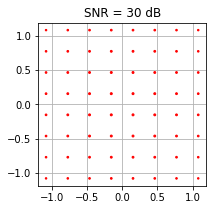

In [21]:
enc_inp = torch.tensor([[1]], dtype=torch.float)

for (k, SNR_db) in enumerate(chParam.SNR_db):
    print(f'---SNR = {chParam.SNR_db[k]} dB---')

    # Initialize network
    encoder = ae.Encoder(in_features=1, width=aeParam.nFeaturesEnc, out_features=chParam.M)
    decoder = ae.Decoder(in_features=2, width=aeParam.nFeaturesDec, out_features=chParam.M)
    CEloss = nn.CrossEntropyLoss()
    # Optimizer
    optimizer = optim.Adam(list(encoder.parameters()) + list(decoder.parameters()), lr=trainingParam.learningRate)

    # Training loop
    for j in range(trainingParam.iterations):
        # first generate the distribution
        s_logits = encoder(enc_inp)
        g_dist = torch_d.Gumbel(loc=torch.tensor([0.]), scale=torch.tensor([1.])) # create Gumbel dist
        g = torch.squeeze(g_dist.sample(sample_shape=[trainingParam.batchSize, chParam.M]))
        s_bar = F.softmax(input=((g + s_logits) / aeParam.temperature), dim=1)
        s = STEFunction.apply(s_bar) # straight through estimator

        # normalization & Modulation
        p_s = F.softmax(s_logits, dim=1)
        constellation = tx.qammod(chParam.M)
        constellation_t = torch.tensor(constellation, dtype=torch.cfloat)
        norm_factor = torch.rsqrt(p_norm(p_s, constellation_t))
        norm_constellation = torch.mul(constellation_t, r2c(norm_factor))
        x = torch.matmul(r2c(s), torch.transpose(input=norm_constellation, dim0=0, dim1=1))
        should_always_be_one = p_norm(p_s, norm_constellation)

        # Channel
        noise_cpx = torch.complex(torch.randn(x.shape), torch.randn(x.shape))
        # noise_cpx = F.normalize(torch.complex(torch.randn(x.shape), torch.randn(x.shape)))
        #should_always_be_one = p_norm(torch.ones(noise_cpx.shape)/noise_cpx.shape[0], noise_cpx)
        sigma2 = torch.tensor(1) / hlp.dB2lin(SNR_db, 'dB')  # 1 corresponds to the Power
        # noise_snr = r2c(torch.sqrt(sigma2)) * noise_cpx
        noise_snr = r2c(torch.sqrt(sigma2)) * torch.rsqrt(torch.tensor(2)) * noise_cpx
        # https://stats.stackexchange.com/questions/187491/why-standard-normal-samples-multiplied-by-sd-are-samples-from-a-normal-dist-with

        y = torch.add(x, noise_snr)
        #should_always_be_one = p_norm(torch.ones(y.shape)/y.shape[0], y)

        # demodulator
        y_vec = hlp.complex2real(torch.squeeze(y)) #perhaps squeeze before transforming
        dec = decoder(y_vec)


        # loss
        loss = CEloss(dec, s.type(torch.float))
        entropy_S = -p_norm(p_s, p_s, lambda x: torch.log2(x))
        loss_hat = loss - entropy_S

        optimizer.zero_grad()
        loss_hat.backward()
        optimizer.step()

        # Printout and visualization
        if j % int(trainingParam.displayStep) == 0:
            print(f'epoch {j}: Loss = {loss.detach().numpy() / np.log(2) :.4f} dB - always 1: {should_always_be_one :.2}')
        if loss < 1e-3:
            break

    # Data for the plots
    p_s_t = F.softmax(encoder(enc_inp), dim=1)
    p_s = p_s_t.detach().numpy()[0]
    constellation = tx.qammod(chParam.M)  # ToDo: returns a complex
    constellation_t = torch.tensor(constellation, dtype=torch.cfloat)
    norm_factor = torch.rsqrt(p_norm(p_s_t, constellation_t))  # ToDo: returns a real
    norm_constellation = r2c(norm_factor) * constellation_t
    #print(p_s)
    print('Power should always be one:', p_norm(p_s_t, norm_constellation))
    plot_2D_PDF(constellation, p_s, SNR_db)